Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

Importing the Dataset

In [2]:
df = pd.read_csv("D://Projects//Pantech//Machine Learning//K Nearest Neighbor - Salary Estimation//salary.csv")
df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


Summarizing the Data

In [3]:
df.shape

(32561, 5)

In [4]:
df.size

162805

In [5]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


Mapping the Salary data to binary values

In [8]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(df.head(10))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


Segregating the Dataset into X and Y

In [9]:
X = df.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [10]:
Y = df.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

Spliting the Dataset into Train and Test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Finding the Best value of K

In [14]:
error = []

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

error

[0.23744011792163125,
 0.19604471195184867,
 0.20194079351431027,
 0.19235966097531015,
 0.19936125783073333,
 0.18732342464070753,
 0.19481636162633584,
 0.18707775457560497,
 0.18928878516152806,
 0.18646357941284855,
 0.19027146542193835,
 0.18646357941284855,
 0.18978012529173321,
 0.18535806411988698,
 0.18867460999877164,
 0.18412971379437415,
 0.18720058960815625,
 0.18584940425009214,
 0.18695491954305368,
 0.18363837366416902,
 0.18658641444539983,
 0.18339270359906645,
 0.18707775457560497,
 0.18486672398968185,
 0.18670924947795112,
 0.18597223928264342,
 0.18597223928264342,
 0.18658641444539983,
 0.18658641444539983,
 0.18363837366416902,
 0.18560373418498957,
 0.1837612086967203,
 0.184498218892028,
 0.18462105392457928,
 0.18425254882692543,
 0.18437538385947672,
 0.18388404372927158,
 0.18732342464070753,
 0.18560373418498957]

Plotting the Error for each value of K

Text(0, 0.5, 'Mean Error')

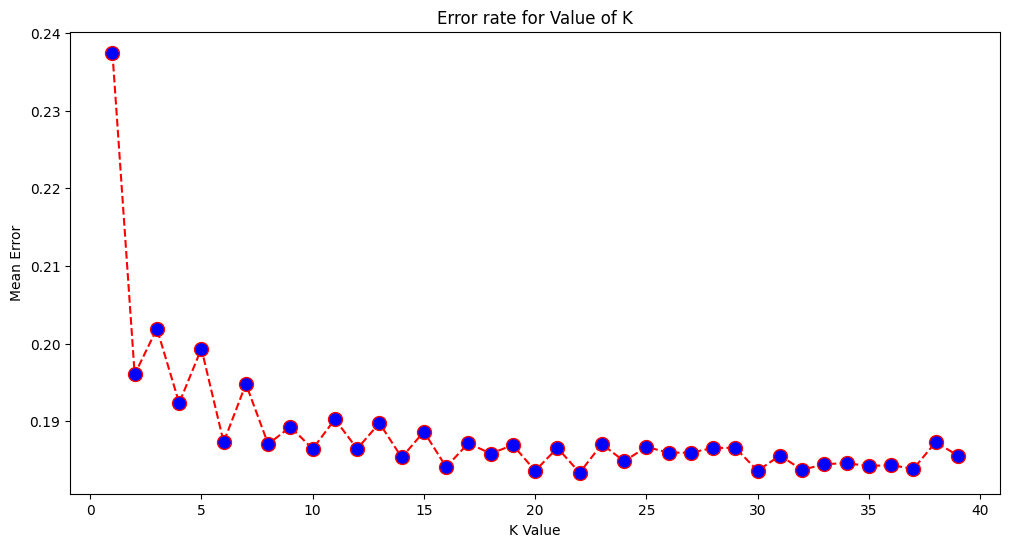

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color = "red", linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', 
         markersize = 10)
plt.title("Error rate for Value of K")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the plot we observe that, for the value of K = 16, we have the least error rate.

Training the model for value of K = 16

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

Predicting whether the Employee will get a Salary more than 50K or not, based upon the other parameters.

In [18]:
age = int(input("Enter the Age of the Employee: "))
edu = int(input("Enter the Employee's Education Number: "))
cg = int(input("Enter Employee's Capital Gain: "))
wh = int(input("Enter the Hours per Week of the Employee: "))

newEmp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("The new Employee will get Salary above 50K")
else:
    print("The new Employee will get not Salary above 50K")

[0]
The new Employee will get not Salary above 50K


Prediction on entire Test Data

In [19]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Evaluating the Model

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5883  310]
 [1189  759]]
Accuracy of the Model: 81.58702862056259%
